In [20]:
%matplotlib notebook

# DELETE UNNECESARY IMPORTS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glasbey

# import scipy as sp
# from scipy import sparse
# import sklearn
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD

# from openTSNE import TSNE
# from openTSNE import affinity, initialization, TSNEEmbedding
# from openTSNE.affinity import Affinities

import time
import pickle
import memory_profiler

%load_ext memory_profiler

from pathlib import Path
import distro

%load_ext watermark

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [2]:
# %load_ext autoreload
# %autoreload 2

# from text_embeddings_src.plotting import (
#     improved_coloring,
# )

In [3]:
# import black
import jupyter_black

jupyter_black.load(line_length=79)

In [4]:
variables_path = Path("../results/variables/iclr24v2")
figures_path = Path("../results/figures")
data_path = Path("../data")

In [5]:
plt.style.use("matplotlib_style.txt")

In [6]:
%watermark -a 'Rita González-Márquez' -t -d -tz -u -v -iv -w -m -h -p transformers,openTSNE

Author: Rita González-Márquez

Last updated: 2024-03-19 03:24:05CET

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.18.1

transformers: 4.35.2
openTSNE    : 1.0.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 3.10.0-1160.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit

Hostname: rgonzalesmarquez_GPU0-llm_gber7

numpy          : 1.26.2
jupyter_black  : 0.3.4
distro         : 1.8.0
pandas         : 2.1.3
sklearn        : 1.3.2
scipy          : 1.11.4
matplotlib     : 3.8.2
glasbey        : 0.2.0
openTSNE       : 1.0.0
memory_profiler: 0.61.0

Watermark: 2.4.3



ICLR new data

# Import

In [7]:
%%time
iclr2024 = pd.read_parquet(
    data_path / "iclr24v2.parquet",
    engine="pyarrow",
)

CPU times: user 193 ms, sys: 88.6 ms, total: 281 ms
Wall time: 224 ms


In [8]:
iclr2024.keywords = iclr2024.keywords.transform(lambda x: list(x))
iclr2024.scores = iclr2024.scores.transform(lambda x: list(x))

In [9]:
iclr2024

,year,id,title,abstract,authors,decision,scores,keywords
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",Reject,"[6, 4, 5]","[deep learning, transfer learning]"
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]"
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning]
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",Accept (Poster),"[6, 5, 6]",[]
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",Accept (Poster),"[7, 9, 5]",[natural language processing]
...,...,...,...,...,...,...,...,...
24343,2024,zxPDdw8koz,CLIP meets Model Zoo Experts: Pseudo-Supervisi...,Contrastive language image pretraining (CLIP) ...,,Withdrawn,"[8, 3, 3, 3]","[contrastive learning, clip, distillation, den..."
24344,2024,zyBJodMrn5,On the generalization capacity of neural netwo...,The advent of the Transformer has led to the d...,"Takuya Ito, Soham Dan, Mattia Rigotti, James K...",Accept (poster),"[8, 3, 6]","[compositional generalization, compositionalit..."
24345,2024,zz61V8bIab,Stochastic Adversarial Networks for Multi-Doma...,Adversarial training has played a pivotal role...,,Withdrawn,"[5, 1, 5]","[multi-domain text classification, adversarial..."
24346,2024,zzqn5G9fjn,Breaking Physical and Linguistic Borders: Mult...,Pretrained large language models (LLMs) have e...,"Wanru Zhao, Royson Lee, Yihong Chen, Xinchi Qi...",Accept (poster),"[5, 3, 1, 8]","[multilingual federated learning, natural lang..."


In [10]:
keywords = [
    "network",
    "graph",
    "reinforcement",
    "language",
    "adversarial",
    "federated",
    "contrastive",
    "domain",
    "diffusion",
    "out-of-dis",
    "continual",
    "distillation",
    "architecture",
    "privacy",
    "protein",
    "fair",
    "attention",
    "video",
    "meta-learning",
    "generative adv",
    "autoencoder",
    "game",
    "semi-sup",
    "pruning",
    "physics",
    "3d",
    "optimization",
    "recurrent",
    "word",
    "bayesian",
    "causal",
    "time series",
    "backdoor",
    "anomaly",
    "object-",
    "multi-agent",
    "offline reinf",
    "imitation",
    "bandit",
    "reasoning",
    "question",
    "vision-lang",
    "audio",
]

keywords = np.array(keywords)
print(f"There are {len(keywords)} labels")

y = np.zeros(iclr2024.shape[0]) * np.nan

for num, keyword in enumerate(keywords):
    mask = [keyword.lower() in t.lower() for t in iclr2024.title]
    y[mask & ~np.isnan(y)] = -1
    y[mask & np.isnan(y)] = num

print(y.size)
print(np.sum(~np.isnan(y)))
print(np.sum(y >= 0))

labeled = y >= 0

iclr_labeled = iclr2024[labeled].reset_index(drop=True)
y_labeled = y[labeled].astype(int)
iclr_labeled["y"] = y_labeled
iclr_labeled["label"] = keywords[y_labeled]

There are 43 labels
24348
14155
10237


#### Colors

In [131]:
len(labelColors)

32

In [164]:
keywords = [
    "network",
    "graph",
    "reinforcement",
    "language",
    "adversarial",
    "federated",
    "contrastive",
    "domain",
    "diffusion",
    "out-of-dis",
    "continual",
    "distillation",
    "architecture",
    "privacy",
    "protein",
    "fair",
    "attention",
    "video",
    "meta-learning",
    "generative adv",
    "autoencoder",
    "game",
    "semi-sup",
    "pruning",
    "physics",
    "3d",
    "optimization",
    "recurrent",
    "word",
    "bayesian",
    "causal",
    "time series",
    "backdoor",
    "anomaly",
    "object-",
    "multi-agent",
    "offline reinf",
    "imitation",
    "bandit",
    "reasoning",
    "question",
    "vision-lang",
    "audio",
]

keywords = np.array(keywords)

labelColors = [
    "#d21820",
    "#1869ff",
    "#008a00",
    "#f36dff",
    "#710079",
    "#aafb00",
    "#00bec2",
    "#ffa235",
    "#5d3d04",
    "#08008a",
    "#005d5d",
    "#9a7d82",
    "#a2aeff",
    "#96b675",
    "#9e28ff",
    "#4d0014",
    "#ffaebe",
    "#ce0092",
    "#00ffb6",
    "#002d00",
    "#9e7500",
    "#3d3541",
    "#f3eb92",
    "#65618a",
    "#8a3d4d",
    "#5904ba",
    "#558a71",
    "#b2bec2",
    "#ff5d82",
    "#1cc600",
    "#92f7ff",
    "#2d86a6",
    "#395d28",
    "#ebceff",
    "#ff5d00",
    "#a661aa",
    "#860000",
    "#350059",
    "#00518e",
    "#9e4910",
    "#cebe00",
    "#002828",
    "#00b2ff",
    "#caa686",
    "#be9ac2",
    "#2d200c",
    "#756545",
    "#8279df",
    "#00c28a",
    "#bae7c2",
]

labelColors = np.array(labelColors)

dict_colors = dict(zip(keywords, labelColors))

In [165]:
dict_colors

{'network': '#d21820',
 'graph': '#1869ff',
 'reinforcement': '#008a00',
 'language': '#f36dff',
 'adversarial': '#710079',
 'federated': '#aafb00',
 'contrastive': '#00bec2',
 'domain': '#ffa235',
 'diffusion': '#5d3d04',
 'out-of-dis': '#08008a',
 'continual': '#005d5d',
 'distillation': '#9a7d82',
 'architecture': '#a2aeff',
 'privacy': '#96b675',
 'protein': '#9e28ff',
 'fair': '#4d0014',
 'attention': '#ffaebe',
 'video': '#ce0092',
 'meta-learning': '#00ffb6',
 'generative adv': '#002d00',
 'autoencoder': '#9e7500',
 'game': '#3d3541',
 'semi-sup': '#f3eb92',
 'pruning': '#65618a',
 'physics': '#8a3d4d',
 '3d': '#5904ba',
 'optimization': '#558a71',
 'recurrent': '#b2bec2',
 'word': '#ff5d82',
 'bayesian': '#1cc600',
 'causal': '#92f7ff',
 'time series': '#2d86a6',
 'backdoor': '#395d28',
 'anomaly': '#ebceff',
 'object-': '#ff5d00',
 'multi-agent': '#a661aa',
 'offline reinf': '#860000',
 'imitation': '#350059',
 'bandit': '#00518e',
 'reasoning': '#9e4910',
 'question': '#cebe0

In [166]:
labels_with_unlabeled, colors = improved_coloring(
    iclr2024["title"], dict_colors
)

In [167]:
unique_colors_iclr, counts_colors_iclr = np.unique(colors, return_counts=True)

In [168]:
len(unique_colors_iclr[:-1])

43

In [169]:
fraction_colors_iclr = counts_colors_iclr[:-1] / np.sum(
    counts_colors_iclr[:-1]
)

In [170]:
# define vocabulary swap
new_colors_legend_swap = {value: key for key, value in dict_colors.items()}

In [171]:
unique_labels = np.vectorize(new_colors_legend_swap.get)(unique_colors_iclr)
unique_labels = np.where(
    unique_colors_iclr == "lightgrey", "unlabeled", unique_labels
)

In [172]:
dict(zip(unique_labels, fraction_colors_iclr * 100))

{'vision-lang': 0.03841130828916033,
 'generative adv': 0.046093569946992395,
 'bandit': 0.806637474072367,
 'continual': 2.112621955903818,
 'reinforcement': 8.097103787354998,
 'audio': 0.6760390258892218,
 'contrastive': 2.60428670200507,
 'meta-learning': 0.20742106476146577,
 'out-of-dis': 0.4225243911807636,
 'graph': 8.212337712222478,
 'bayesian': 1.8053314895905355,
 'time series': 0.10755166320964892,
 'imitation': 1.1216102020434815,
 'backdoor': 0.9526004455711761,
 'game': 1.3367135284627794,
 'fair': 1.5594991165399092,
 'optimization': 5.231620188983637,
 '3d': 0.007682261657832066,
 'diffusion': 3.9333179688100177,
 'pruning': 1.5441345932242452,
 'adversarial': 6.6605208573404004,
 'offline reinf': 0.030729046631328263,
 'physics': 0.8834600906506876,
 'causal': 1.89751862948452,
 'privacy': 1.0524698471229932,
 'distillation': 1.882154106168856,
 'protein': 0.8373665207036952,
 'reasoning': 1.851425059537528,
 'autoencoder': 1.8053314895905355,
 'architecture': 2.2509

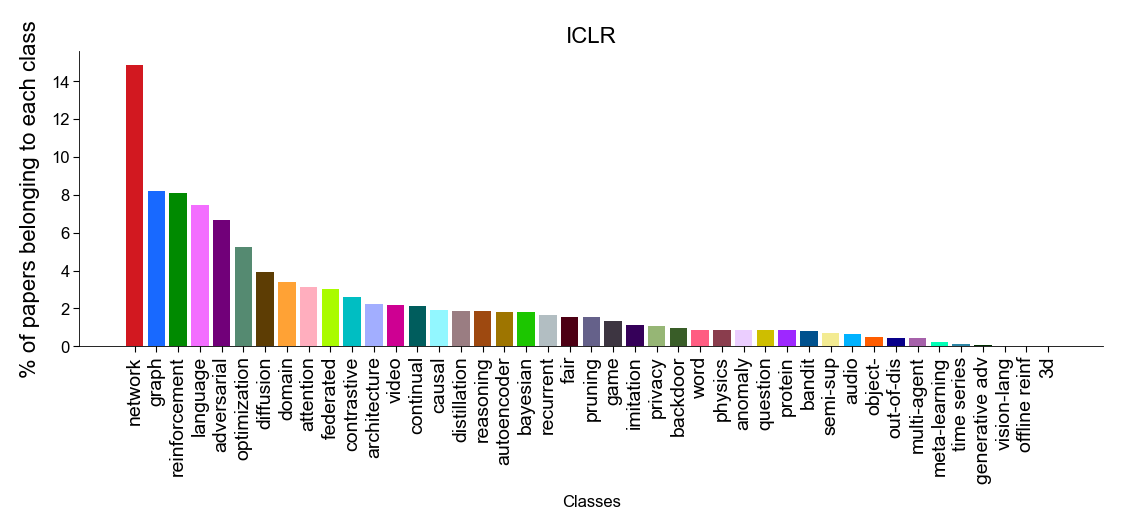

In [173]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5.5, 2.5), dpi=200)
ax.bar(
    np.arange(len(fraction_colors_iclr)),
    np.flip(np.sort(fraction_colors_iclr * 100)),
    color=unique_colors_iclr[:-1][
        np.flip(np.argsort(fraction_colors_iclr * 100))
    ],
)

ax.set_xticks(
    np.arange(len(fraction_colors_iclr)),
    labels=unique_labels[:-1][np.flip(np.argsort(fraction_colors_iclr * 100))],
    rotation="vertical",
    fontsize=7,
)
ax.set_ylabel("% of papers belonging to each class", fontsize=8)
ax.set_xlabel("Classes")
ax.set_title("ICLR")


fig.savefig(figures_path / "barplot_class_distribution_iclr_2024.png")

# Assign keywords

## Lists of keywords and corresponding labels

In [11]:
final_keywords_groups = [
    ###### ADVERSARIAL
    [
        ("adversarial", 60),
        ("adversarial attack", 121),
        ("adversarial attacks", 106),
        ("adversarial defense", 50),
        ("adversarial examples", 196),
        ("adversarial learning", 93),
        ("adversarial machine learning", 54),
        ("adversarial robustness", 241),
        ("adversarial training", 217),
    ],
    ###### TRANSFORMERS
    [
        ("attention", 183),
        ("attention mechanism", 53),
        ("transformer", 340),
        ("transformers", 261),
        ("self-attention", 73),
    ],
    ###### AUTOENCODERS
    [
        ("autoencoder", 63),
        ("autoencoders", 52),
        ("vae", 71),
        ("variational autoencoder", 93),
        ("variational autoencoders", 83),
    ],
    [("anomaly detection", 109)],
    [("causal discovery", 53), ("causal inference", 104), ("causality", 80)],
    [("clustering", 116)],
    [("compression", 121), ("model compression", 135)],
    ###### COMPUTER VISION
    [
        ("object detection", 125),
    ],
    ###### CL
    [("contrastive learning", 344)],
    ###### CNNs
    [
        ("convolutional neural network", 76),
        ("convolutional neural networks", 130),
        ("cnn", 88),
    ],
    ###### DIFFUSION MODELS
    [("diffusion", 69), ("diffusion model", 167), ("diffusion models", 280)],
    ###### EXPLAINABLE AI
    [("explainability", 131), ("explainable ai", 92)],
    [("interpretability", 356)],
    [("fairness", 182)],
    [("federated learning", 485)],
    ###### GANS
    [
        ("generative adversarial network", 70),
        ("generative adversarial networks", 190),
        ("gan", 168),
        ("gans", 91),
    ],
    ###### GRAPH
    [
        ("graph", 48),
        ("graph neural network", 230),
        ("graph neural networks", 563),
        ("graph representation learning", 85),
        ("gnn", 64),
    ],
    ###### LLMS
    [
        ("llm", 80),
        ("large language model", 210),
        ("large language models", 447),
        ("prompting", 48),
    ],
    [("knowledge distillation", 211)],
    [
        (
            "natural language processing",
            433,
        ),
        ("nlp", 166),
        ("language model", 105),
        ("language models", 151),
        ("language modeling", 85),
        ("machine translation", 91),
        ("question answering", 59),
        ("reasoning", 85),
    ],
    ###### META-LEARNING
    [("meta learning", 121), ("meta-learning", 301)],
    [("network pruning", 48), ("pruning", 140)],
    [("neural architecture search", 180)],
    [("optimal transport", 165)],
    ###### OPTIMIZATION
    [
        ("stochastic gradient descent", 77),
        ("stochastic optimization", 56),
        ("sgd", 86),
        ("optimization", 410),
        ("non-convex optimization", 66),
        ("convex optimization", 57),
        ("gradient descent", 86),
        ("combinatorial optimization", 69),
        ("bayesian optimization", 64),
    ],
    ###### OUT-OF-DISTRIBUTION
    [
        ("out-of-distribution", 53),
        ("out-of-distribution detection", 92),
        ("out-of-distribution generalization", 59),
        ("distribution shift", 96),
    ],
    ###### PRIVACY
    [("differential privacy", 154), ("privacy", 99)],
    ###### RNNs
    [
        ("rnn", 65),
        ("recurrent neural network", 48),
        ("recurrent neural networks", 114),
        ("lstm", 66),
    ],
    ###### RL
    [("reinforcement learning", 1608), ("deep reinforcement learning", 298)],
    [("active learning", 131)],
    [("model-based reinforcement learning", 111)],
    [("multi-agent reinforcement learning", 162)],
    [("multi-task learning", 141)],
    [("imitation learning", 171)],
    [("offline reinforcement learning", 150), ("offline rl", 55)],
    [("continual learning", 339), ("lifelong learning", 82)],
    ### NOT RL
    [
        ("in-context learning", 105),
    ],
    [("few-shot learning", 218)],
    [("robustness", 411)],
    [("self-supervised learning", 473)],
    [("semi-supervised learning", 253)],
    [("time series", 129), ("time series forecasting", 54)],
    ###### TRANSFER LEARNING
    [
        ("transfer learning", 388),
        ("domain adaptation", 176),
        ("domain generalization", 124),
    ],
    ###### VISION
    [("vision transformer", 98), ("vision transformers", 51)],
    [("vision-language models", 48), ("clip", 70)],
]

In [12]:
len(final_keywords_groups)

45

In [13]:
dict_keyword_to_label = {
    ###### ADVERSARIAL
    "adversarial": "adversarial",
    "adversarial attack": "adversarial",
    "adversarial attacks": "adversarial",
    "adversarial defense": "adversarial",
    "adversarial examples": "adversarial",
    "adversarial learning": "adversarial",
    "adversarial machine learning": "adversarial",
    "adversarial robustness": "adversarial",
    "adversarial training": "adversarial",
    ###### TRANSFORMERS
    "attention": "transformers",
    "attention mechanism": "transformers",
    "transformer": "transformers",
    "transformers": "transformers",
    "self-attention": "transformers",
    ###### AUTOENCODERS
    "autoencoder": "autoencoders",
    "autoencoders": "autoencoders",
    "vae": "autoencoders",
    "variational autoencoder": "autoencoders",
    "variational autoencoders": "autoencoders",
    ######
    "anomaly detection": "anomaly detection",
    ###### CAUSALITY
    "causal discovery": "causality",
    "causal inference": "causality",
    "causality": "causality",
    ######
    "clustering": "clustering",
    ###### COMPRESSION
    "compression": "compression",
    "model compression": "compression",
    ######
    "object detection": "object detection",
    ######
    "contrastive learning": "contrastive learning",
    ###### CNNs
    "convolutional neural network": "CNNs",
    "convolutional neural networks": "CNNs",
    "cnn": "CNNs",
    ###### DIFFUSION MODELS
    "diffusion": "diffusion models",
    "diffusion model": "diffusion models",
    "diffusion models": "diffusion models",
    ###### EXPLAINABILITY
    "explainability": "explainability",
    "explainable ai": "explainability",
    ######
    "interpretability": "interpretability",
    ######
    "fairness": "fairness",
    ######
    "federated learning": "federated learning",
    ###### GANs
    "generative adversarial network": "GANs",
    "generative adversarial networks": "GANs",
    "gan": "GANs",
    "gans": "GANs",
    ###### GRAPHS
    "graph": "graphs",
    "graph neural network": "graphs",
    "graph neural networks": "graphs",
    "graph representation learning": "graphs",
    "gnn": "graphs",
    ###### LLMs
    "llm": "LLMs",
    "large language model": "LLMs",
    "large language models": "LLMs",
    "prompting": "LLMs",
    ######
    "knowledge distillation": "knowledge distillation",
    ###### LANGUAGE MODELS
    "natural language processing": "language models",
    "nlp": "language models",
    "language model": "language models",
    "language models": "language models",
    "language modeling": "language models",
    "machine translation": "language models",
    "question answering": "language models",
    "reasoning": "language models",
    ###### META LEARNING
    "meta learning": "meta learning",
    "meta-learning": "meta learning",
    ###### PRUNING
    "network pruning": "pruning",
    "pruning": "pruning",
    ######
    "neural architecture search": "neural architecture search",
    ######
    "optimal transport": "optimal transport",
    ###### OPTIMIZATION
    "stochastic gradient descent": "optimization",
    "stochastic optimization": "optimization",
    "sgd": "optimization",
    "optimization": "optimization",
    "non-convex optimization": "optimization",
    "convex optimization": "optimization",
    "gradient descent": "optimization",
    "combinatorial optimization": "optimization",
    "bayesian optimization": "optimization",
    ###### OUT-OF-DISTRIBUTION
    "out-of-distribution": "out-of-distribution",
    "out-of-distribution detection": "out-of-distribution",
    "out-of-distribution generalization": "out-of-distribution",
    "distribution shift": "out-of-distribution",
    ###### PRIVACY
    "differential privacy": "privacy",
    "privacy": "privacy",
    ###### RNNs
    "rnn": "RNNs",
    "recurrent neural network": "RNNs",
    "recurrent neural networks": "RNNs",
    "lstm": "RNNs",
    ###### REINFORCEMENT LEARNING
    "reinforcement learning": "RL",
    "deep reinforcement learning": "RL",
    ######
    "active learning": "active learning",
    ######
    "model-based reinforcement learning": "model-based RL",
    ######
    "multi-agent reinforcement learning": "multi-agent RL",
    ######
    "multi-task learning": "multi-task learning",
    ######
    "imitation learning": "imitation learning",
    ###### OFFLINE RL
    "offline reinforcement learning": "offline RL",
    "offline rl": "offline RL",
    ###### CONTINUAL LEARNING
    "continual learning": "continual learning",
    "lifelong learning": "continual learning",
    ######
    "in-context learning": "in-context learning",
    ######
    "few-shot learning": "few-shot learning",
    ######
    "robustness": "robustness",
    ######
    "self-supervised learning": "self-supervised learning",
    ######
    "semi-supervised learning": "semi-supervised learning",
    ###### TIME SERIES
    "time series": "time series",
    "time series forecasting": "time series",
    ###### TRANSFER LEARNING
    "transfer learning": "transfer learning",
    "domain adaptation": "transfer learning",
    "domain generalization": "transfer learning",
    ###### ViTs
    "vision transformer": "ViTs",
    "vision transformers": "ViTs",
    ###### VISION-LANGUAGE MODELS
    "vision-language models": "vision-language models",
    "clip": "vision-language models",
}

In [18]:
len(np.unique(list(dict_keyword_to_label.keys())))

111

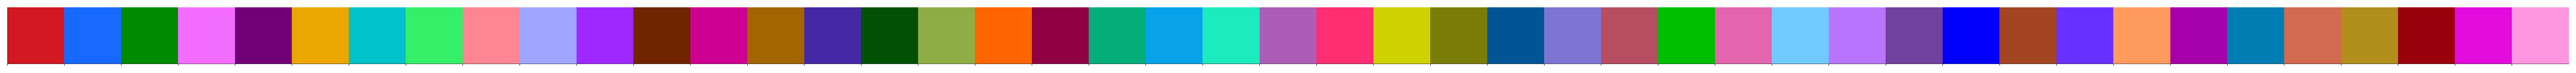

In [26]:
%matplotlib inline
palette = glasbey.create_palette(
    palette_size=len(np.unique(list(dict_keyword_to_label.values()))),
    lightness_bounds=(20, 75),
    chroma_bounds=(50, 90),
)
sns.palplot(palette)

In [27]:
dict_label_to_color = dict(zip(unique_labels, palette))
dict_label_to_color["unlabeled"] = "lightgrey"
dict_label_to_color

{'CNNs': '#d21820',
 'GANs': '#1869ff',
 'LLMs': '#008a00',
 'RL': '#f36dff',
 'RNNs': '#710079',
 'ViTs': '#eba600',
 'active learning': '#00c2ca',
 'adversarial': '#35ef69',
 'anomaly detection': '#ff8692',
 'autoencoders': '#9ea6ff',
 'causality': '#9e28ff',
 'clustering': '#712400',
 'compression': '#ce0092',
 'continual learning': '#a26500',
 'contrastive learning': '#4528a6',
 'diffusion models': '#005104',
 'explainability': '#8eae45',
 'fairness': '#ff6500',
 'federated learning': '#8e0041',
 'few-shot learning': '#04ae79',
 'graphs': '#08a2eb',
 'imitation learning': '#1cebbe',
 'in-context learning': '#ae5db6',
 'interpretability': '#ff2d71',
 'knowledge distillation': '#ced200',
 'language models': '#797d08',
 'meta learning': '#005596',
 'model-based RL': '#7d75d2',
 'multi-agent RL': '#b64d61',
 'multi-task learning': '#00be00',
 'neural architecture search': '#e365ae',
 'object detection': '#71caff',
 'offline RL': '#ba75ff',
 'optimal transport': '#71419e',
 'optimizatio

## Assignment

In [30]:
import itertools


def assign_labels_and_colors(
    data, keywords_and_freqs, dict_keyword_to_label, dict_color_legend=None
):
    """Assign labels and colors from list with lists of keywords.

    Parameters
    ----------
    data: list of lists, len (n_samples)
        List with lists of keywords for every paper.
    keywords_and_freqs: list of lists, len (n_labels)
        List of keywords groups. Contains all keywords and frequencies, with sublists of subgroups of keywords.
    dict_keyword_to_label: dict
        Dictionary assigning to each keyword its label (e.g. to all keywords in same subgroup same label).
    dict_color_legend: dict, len (n_labels)
        Dictionary assigning to each label a color.

    Returns
    -------
    labels: array, shape (n_samples,)
        Label for each paper.
    colors: array, shape (n_samples,)
        Color for each paper.


    """

    # prepare dict_freqs
    dict_freqs = dict(list(itertools.chain.from_iterable(keywords_and_freqs)))
    dict_freqs[
        "unlabeled"
    ] = 1e9  # assign very large value to unlabeled for argmax

    # clean empty lists of keywords from the data
    data_without_empty = [
        ["unlabeled"] if elem == [] else elem for elem in data
    ]

    # choose keywords for each paper
    chosen_keywords = []
    for list_keywords in data_without_empty:
        list_keywords_filtered = [
            elem if elem in set(dict_freqs.keys()) else "unlabeled"
            for elem in list_keywords
        ]

        freqs = np.vectorize(dict_freqs.get)(list_keywords_filtered)

        chosen_keyword = list_keywords_filtered[np.argmin(freqs)]
        chosen_keywords.append(chosen_keyword)

    chosen_keywords = np.array(chosen_keywords)

    # map chosen keywords to labels
    dict_keyword_to_label["unlabeled"] = "unlabeled"
    labels = np.vectorize(dict_keyword_to_label.get)(chosen_keywords)

    # colors
    colors = np.vectorize(dict_color_legend.get)(labels)

    return labels, colors

In [31]:
%%time
labels_iclr, colors_iclr = assign_labels_and_colors(
    iclr2024.keywords.to_list(),
    final_keywords_groups,
    dict_keyword_to_label,
    dict_label_to_color,
)

CPU times: user 674 ms, sys: 280 ms, total: 954 ms
Wall time: 725 ms


In [35]:
# save
np.save(variables_path / "labels_iclr", labels_iclr)
np.save(variables_path / "colors_iclr", colors_iclr)

f = open(variables_path / "dict_label_to_color.pkl", "wb")
pickle.dump(dict_label_to_color, f)
f.close()

In [45]:
print(
    "Percentage of unlabeled papers: ",
    np.sum(labels_iclr == "unlabeled") / len(labels_iclr) * 100,
)
print(
    "Number of unlabeled papers: ",
    np.sum(labels_iclr == "unlabeled"),
)

Percentage of unlabeled papers:  46.59931000492853
Number of unlabeled papers:  11346


In [47]:
print(
    "Papers without any keywords: ",
    np.sum([1 if elem == [] else 0 for elem in iclr2024.keywords])
    / len(labels_iclr)
    * 100,
)

Papers without any keywords:  8.75225891243634


In [48]:
# Examples of papers with keywords that have not being assigned a label
# We can see that they contain very general or very specific keywords that were filtered out in our selection
iclr2024.keywords.to_numpy()[labels_iclr == "unlabeled"][:50]

array([list(['unsupervised learning']), list([]),
       list(['unsupervised learning', 'deep learning']), list([]),
       list(['deep learning', 'supervised learning']),
       list(['deep learning', 'unsupervised learning']), list([]),
       list(['theory', 'deep learning']), list([]),
       list(['deep learning', 'multi-modal learning', 'structured prediction']),
       list(['deep learning']), list([]),
       list(['deep learning', 'theory']),
       list(['deep learning', 'unsupervised learning', 'applications']),
       list(['deep learning']), list(['theory', 'deep learning']),
       list([]), list(['deep learning', 'applications']), list([]),
       list([]), list(['deep learning', 'unsupervised learning']),
       list(['deep learning']), list([]),
       list(['deep learning', 'supervised learning']),
       list(['deep learning', 'unsupervised learning']),
       list(['computer vision', 'deep learning']),
       list(['deep learning', 'computer vision']),
       list([

# Add column to dataframe and resave

In [51]:
iclr2024.head()

,year,id,title,abstract,authors,decision,scores,keywords
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",Reject,"[6, 4, 5]","[deep learning, transfer learning]"
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]"
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning]
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",Accept (Poster),"[6, 5, 6]",[]
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",Accept (Poster),"[7, 9, 5]",[natural language processing]


In [53]:
iclr2024["labels"] = labels_iclr

In [55]:
iclr2024.head()

,year,id,title,abstract,authors,decision,scores,keywords,labels
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",Reject,"[6, 4, 5]","[deep learning, transfer learning]",transfer learning
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]",language models
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning],unlabeled
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",Accept (Poster),"[6, 5, 6]",[],unlabeled
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",Accept (Poster),"[7, 9, 5]",[natural language processing],language models


In [54]:
# save
iclr2024.to_parquet(
    data_path / "iclr24v2.parquet",
    index=False,
    engine="pyarrow",
)

In [44]:
# dict_keyword_to_label_test = {
#     ###### ADVERSARIAL
#     "adversarial": "adversarial",
#     "adversarial attack": "adversarial",
#     "adversarial attacks": "adversarial",
#     "adversarial defense": "adversarial",
#     "adversarial examples": "adversarial",
#     "adversarial learning": "adversarial",
#     "adversarial machine learning": "adversarial",
#     "adversarial robustness": "adversarial",
#     "adversarial training": "adversarial",
#     ###### TRANSFORMERS
#     "attention": "transformers",
#     "attention mechanism": "transformers",
#     "transformer": "transformers",
#     "transformers": "transformers",
#     "self-attention": "transformers",
#     "llm" : "LLMs",
# }

In [14]:
class_name, class_counts = np.unique(list(dict_keyword_to_label.values()), return_counts=True)

In [20]:
number_keywords_per_class = dict(zip(class_name,class_counts))
number_keywords_per_class["adversarial"]

9

In [49]:
# PRINT LATEX TABLE
star= "{*}"
previous_class_name = 0
for keyword, class_name in dict_keyword_to_label.items():
    if (class_name != previous_class_name) | (previous_class_name==0):  # first cell of class
        first_str= "{" + str(number_keywords_per_class[class_name]) + "}"
        if class_name[0].isupper():
            second_str= "{"+class_name+"}"
        else:
            second_str= "{"+class_name[0].upper()+class_name[1:]+"}"

        print("\midrule")
        print(f"\multirow{first_str}{star}{second_str} & {keyword}    \\\\ ")

    if class_name == previous_class_name:
        print(f"                      & {keyword} \\\\ ")

    previous_class_name = class_name
    

\midrule
\multirow{9}{*}{Adversarial} & adversarial    \\ 
                      & adversarial attack \\ 
                      & adversarial attacks \\ 
                      & adversarial defense \\ 
                      & adversarial examples \\ 
                      & adversarial learning \\ 
                      & adversarial machine learning \\ 
                      & adversarial robustness \\ 
                      & adversarial training \\ 
\midrule
\multirow{5}{*}{Transformers} & attention    \\ 
                      & attention mechanism \\ 
                      & transformer \\ 
                      & transformers \\ 
                      & self-attention \\ 
\midrule
\multirow{5}{*}{Autoencoders} & autoencoder    \\ 
                      & autoencoders \\ 
                      & vae \\ 
                      & variational autoencoder \\ 
                      & variational autoencoders \\ 
\midrule
\multirow{1}{*}{Anomaly detection} & anomaly detection    \\ 
\mid

\begin{table}[]
\begin{tabular}{@{}ll@{}}
\toprule
Class                 & Keyword        \\ \midrule

\multirow{3}{*}{LLMs} & transformer    \\
                      & language model \\
                      & llm            \\ \cmidrule(l){2-2} 
\end{tabular}
\end{table}

### Adding new columns

In [40]:
# dict_keyword_to_label_test = {
#     ###### ADVERSARIAL
#     "adversarial": "adversarial",
#     "adversarial attack": "adversarial",
#     "adversarial attacks": "adversarial",
#     "adversarial defense": "adversarial",
#     "adversarial examples": "adversarial",
#     "adversarial learning": "adversarial",
#     "adversarial machine learning": "adversarial",
#     "adversarial robustness": "adversarial",
#     "adversarial training": "adversarial",
#     ###### TRANSFORMERS
#     "attention": "transformers",
#     "attention mechanism": "transformers",
#     "transformer": "transformers",
#     "transformers": "transformers",
#     "self-attention": "transformers",
#     "llm": "LLMs",
# }
# len(dict_keyword_to_label_test)

#### create dataframe

In [41]:
df_table = pd.DataFrame(
    {
        "class_name": list(dict_keyword_to_label.values()),
        "keyword": list(dict_keyword_to_label.keys()),
    },
)

In [42]:
df_table

,class_name,keyword
0,adversarial,adversarial
1,adversarial,adversarial attack
2,adversarial,adversarial attacks
3,adversarial,adversarial defense
4,adversarial,adversarial examples
...,...,...
106,transfer learning,domain generalization
107,ViTs,vision transformer
108,ViTs,vision transformers
109,vision-language models,vision-language models


#### Add frequency per keyword

In [43]:
import itertools

dict_freqs = dict(list(itertools.chain.from_iterable(final_keywords_groups)))
dict_freqs

{'adversarial': 60,
 'adversarial attack': 121,
 'adversarial attacks': 106,
 'adversarial defense': 50,
 'adversarial examples': 196,
 'adversarial learning': 93,
 'adversarial machine learning': 54,
 'adversarial robustness': 241,
 'adversarial training': 217,
 'attention': 183,
 'attention mechanism': 53,
 'transformer': 340,
 'transformers': 261,
 'self-attention': 73,
 'autoencoder': 63,
 'autoencoders': 52,
 'vae': 71,
 'variational autoencoder': 93,
 'variational autoencoders': 83,
 'anomaly detection': 109,
 'causal discovery': 53,
 'causal inference': 104,
 'causality': 80,
 'clustering': 116,
 'compression': 121,
 'model compression': 135,
 'object detection': 125,
 'contrastive learning': 344,
 'convolutional neural network': 76,
 'convolutional neural networks': 130,
 'cnn': 88,
 'diffusion': 69,
 'diffusion model': 167,
 'diffusion models': 280,
 'explainability': 131,
 'explainable ai': 92,
 'interpretability': 356,
 'fairness': 182,
 'federated learning': 485,
 'generati

In [44]:
df_table["keyword_frequency"] = df_table["keyword"].map(dict_freqs)

In [45]:
df_table

,class_name,keyword,keyword_frequency
0,adversarial,adversarial,60
1,adversarial,adversarial attack,121
2,adversarial,adversarial attacks,106
3,adversarial,adversarial defense,50
4,adversarial,adversarial examples,196
...,...,...,...
106,transfer learning,domain generalization,124
107,ViTs,vision transformer,98
108,ViTs,vision transformers,51
109,vision-language models,vision-language models,48


#### Add n_samples per class

In [46]:
labels_iclr = np.load(variables_path / "updated_dataset" / "labels_iclr.npy")
# colors_iclr = np.load(variables_path / "updated_dataset" / "colors_iclr.npy")

# pickle_in = open(
#     variables_path / "updated_dataset" / "dict_label_to_color.pkl", "rb"
# )
# dict_label_to_color = pickle.load(pickle_in)

In [47]:
class_name_for_samples, class_n_samples = np.unique(
    labels_iclr, return_counts=True
)

In [48]:
dict_n_samples_per_class = dict(zip(class_name_for_samples, class_n_samples))
dict_n_samples_per_class

{'CNNs': 247,
 'GANs': 380,
 'RNNs': 250,
 'ViTs': 130,
 'active learning': 109,
 'adversarial': 868,
 'anomaly detection': 87,
 'autoencoders': 330,
 'causality': 200,
 'clustering': 97,
 'compression': 214,
 'continual learning': 313,
 'contrastive learning': 240,
 'diffusion models': 437,
 'explainability': 191,
 'fairness': 133,
 'federated learning': 297,
 'few-shot learning': 157,
 'graphs': 729,
 'imitation learning': 143,
 'in-context learning': 87,
 'interpretability': 177,
 'knowledge distillation': 149,
 'language models': 798,
 'llms': 534,
 'meta learning': 275,
 'model-based reinforcement learning': 105,
 'multi-agent reinforcement learning': 151,
 'multi-task learning': 121,
 'neural architecture search': 138,
 'object detection': 106,
 'offline RL': 184,
 'optimal transport': 132,
 'optimization': 785,
 'out-of-distribution': 272,
 'privacy': 214,
 'pruning': 133,
 'reinforcement learning': 1261,
 'robustness': 173,
 'self-supervised learning': 256,
 'semi-supervised le

In [71]:
dict_n_samples_per_class["LLMs"] = dict_n_samples_per_class["llms"]
dict_n_samples_per_class.pop("llms")
dict_n_samples_per_class["RL"] = dict_n_samples_per_class[
    "reinforcement learning"
]
dict_n_samples_per_class.pop("reinforcement learning")
dict_n_samples_per_class["model-based RL"] = dict_n_samples_per_class[
    "model-based reinforcement learning"
]
dict_n_samples_per_class.pop("model-based reinforcement learning")
dict_n_samples_per_class["multi-agent RL"] = dict_n_samples_per_class[
    "multi-agent reinforcement learning"
]
dict_n_samples_per_class.pop("multi-agent reinforcement learning")
dict_n_samples_per_class

{'CNNs': 247,
 'GANs': 380,
 'RNNs': 250,
 'ViTs': 130,
 'active learning': 109,
 'adversarial': 868,
 'anomaly detection': 87,
 'autoencoders': 330,
 'causality': 200,
 'clustering': 97,
 'compression': 214,
 'continual learning': 313,
 'contrastive learning': 240,
 'diffusion models': 437,
 'explainability': 191,
 'fairness': 133,
 'federated learning': 297,
 'few-shot learning': 157,
 'graphs': 729,
 'imitation learning': 143,
 'in-context learning': 87,
 'interpretability': 177,
 'knowledge distillation': 149,
 'language models': 798,
 'meta learning': 275,
 'multi-task learning': 121,
 'neural architecture search': 138,
 'object detection': 106,
 'offline RL': 184,
 'optimal transport': 132,
 'optimization': 785,
 'out-of-distribution': 272,
 'privacy': 214,
 'pruning': 133,
 'robustness': 173,
 'self-supervised learning': 256,
 'semi-supervised learning': 176,
 'time series': 140,
 'transfer learning': 417,
 'transformers': 555,
 'unlabeled': 11350,
 'vision-language models': 106

In [72]:
len(dict_n_samples_per_class)

46

In [74]:
df_table["n_samples"] = df_table["class_name"].map(dict_n_samples_per_class)

In [75]:
df_table

,class_name,keyword,keyword_frequency,n_samples,keywords_per_class
0,adversarial,adversarial,60,868,9
1,adversarial,adversarial attack,121,868,9
2,adversarial,adversarial attacks,106,868,9
3,adversarial,adversarial defense,50,868,9
4,adversarial,adversarial examples,196,868,9
...,...,...,...,...,...
106,transfer learning,domain generalization,124,417,3
107,ViTs,vision transformer,98,130,2
108,ViTs,vision transformers,51,130,2
109,vision-language models,vision-language models,48,106,2


####  Add number of keywords per class

In [51]:
class_name, class_counts = np.unique(
    list(dict_keyword_to_label.values()), return_counts=True
)

In [52]:
number_keywords_per_class = dict(zip(class_name, class_counts))
# fix for stupid difference in capitalizing or not due to diff in dict_keyword_to_label and dict_keyword_to_label_old (LLMs, RL, model-based RL, multi-agent RL)
number_keywords_per_class

{'CNNs': 3,
 'GANs': 4,
 'LLMs': 4,
 'RL': 2,
 'RNNs': 4,
 'ViTs': 2,
 'active learning': 1,
 'adversarial': 9,
 'anomaly detection': 1,
 'autoencoders': 5,
 'causality': 3,
 'clustering': 1,
 'compression': 2,
 'continual learning': 2,
 'contrastive learning': 1,
 'diffusion models': 3,
 'explainability': 2,
 'fairness': 1,
 'federated learning': 1,
 'few-shot learning': 1,
 'graphs': 5,
 'imitation learning': 1,
 'in-context learning': 1,
 'interpretability': 1,
 'knowledge distillation': 1,
 'language models': 8,
 'meta learning': 2,
 'model-based RL': 1,
 'multi-agent RL': 1,
 'multi-task learning': 1,
 'neural architecture search': 1,
 'object detection': 1,
 'offline RL': 2,
 'optimal transport': 1,
 'optimization': 9,
 'out-of-distribution': 4,
 'privacy': 2,
 'pruning': 2,
 'robustness': 1,
 'self-supervised learning': 1,
 'semi-supervised learning': 1,
 'time series': 2,
 'transfer learning': 3,
 'transformers': 5,
 'vision-language models': 2}

In [53]:
df_table["keywords_per_class"] = df_table["class_name"].map(
    number_keywords_per_class
)

In [61]:
df_table

,class_name,keyword,keyword_frequency,n_samples,keywords_per_class
0,adversarial,adversarial,60,868.0,9
1,adversarial,adversarial attack,121,868.0,9
2,adversarial,adversarial attacks,106,868.0,9
3,adversarial,adversarial defense,50,868.0,9
4,adversarial,adversarial examples,196,868.0,9
...,...,...,...,...,...
106,transfer learning,domain generalization,124,417.0,3
107,ViTs,vision transformer,98,130.0,2
108,ViTs,vision transformers,51,130.0,2
109,vision-language models,vision-language models,48,106.0,2


In [56]:
df_table.iloc[i].class_name

'transfer learning'

#### sort table by n_samples

In [81]:
df_table.sort_values(by="n_samples", ascending=False, inplace=True)

In [83]:
df_table

,class_name,keyword,keyword_frequency,n_samples,keywords_per_class
86,RL,reinforcement learning,1608,1261,2
87,RL,deep reinforcement learning,298,1261,2
8,adversarial,adversarial training,217,868,9
2,adversarial,adversarial attacks,106,868,9
3,adversarial,adversarial defense,50,868,9
...,...,...,...,...,...
26,object detection,object detection,125,106,1
89,model-based RL,model-based reinforcement learning,111,105,1
23,clustering,clustering,116,97,1
19,anomaly detection,anomaly detection,109,87,1


#### Print table

\begin{table}[]
\begin{tabular}{@{}ll@{}}
\toprule
Class                 &  N_SAMPLES               & Keyword        &  Frequency\\ \midrule
\multirow{3}{*}{LLMs} & \multirow{3}{*}{567}    & transformer    &  X\\
                      &                          & language model &  X\\
                      &                          & llm            &  X\\ \cmidrule(l){2-2} 
\end{tabular}
\end{table}

In [76]:
star = "{*}"
previous_class_name = 0
for i in np.arange(df_table.shape[0]):
    class_name = df_table.iloc[i].class_name
    keyword = df_table.iloc[i].keyword
    frequency = df_table.iloc[i].keyword_frequency

    if (class_name != previous_class_name) | (
        previous_class_name == 0
    ):  # first cell of class
        keywords_per_class_str = (
            "{" + str(df_table.iloc[i].keywords_per_class) + "}"
        )
        # class name
        if class_name[0].isupper():
            class_name_str = "{" + class_name + "}"
        else:
            class_name_str = "{" + class_name[0].upper() + class_name[1:] + "}"

        # n_samples
        n_samples_str = "{" + str(int(df_table.iloc[i].n_samples)) + "}"

        print("\midrule")
        print(
            f"\multirow{keywords_per_class_str}{star}{class_name_str} & \multirow{keywords_per_class_str}{star}{n_samples_str} & {keyword} & {frequency}    \\\\ "
        )

    if class_name == previous_class_name:
        print(f"                      &   &  {keyword} & {frequency} \\\\ ")

    previous_class_name = class_name

\midrule
\multirow{9}{*}{Adversarial} & \multirow{9}{*}{868} & adversarial & 60    \\ 
                      &   &  adversarial attack & 121 \\ 
                      &   &  adversarial attacks & 106 \\ 
                      &   &  adversarial defense & 50 \\ 
                      &   &  adversarial examples & 196 \\ 
                      &   &  adversarial learning & 93 \\ 
                      &   &  adversarial machine learning & 54 \\ 
                      &   &  adversarial robustness & 241 \\ 
                      &   &  adversarial training & 217 \\ 
\midrule
\multirow{5}{*}{Transformers} & \multirow{5}{*}{555} & attention & 183    \\ 
                      &   &  attention mechanism & 53 \\ 
                      &   &  transformer & 340 \\ 
                      &   &  transformers & 261 \\ 
                      &   &  self-attention & 73 \\ 
\midrule
\multirow{5}{*}{Autoencoders} & \multirow{5}{*}{330} & autoencoder & 63    \\ 
                      &   &  autoencoders

In [82]:
star = "{*}"
previous_class_name = 0
for i in np.arange(df_table.shape[0]):
    class_name = df_table.iloc[i].class_name
    keyword = df_table.iloc[i].keyword
    frequency = df_table.iloc[i].keyword_frequency

    if (class_name != previous_class_name) | (
        previous_class_name == 0
    ):  # first cell of class
        keywords_per_class_str = (
            "{" + str(df_table.iloc[i].keywords_per_class) + "}"
        )
        # class name
        if class_name[0].isupper():
            class_name_str = "{" + class_name + "}"
        else:
            class_name_str = "{" + class_name[0].upper() + class_name[1:] + "}"

        # n_samples
        n_samples_str = "{" + str(int(df_table.iloc[i].n_samples)) + "}"

        print("\midrule")
        print(
            f"\multirow{keywords_per_class_str}{star}{class_name_str} & \multirow{keywords_per_class_str}{star}{n_samples_str} & {keyword} & {frequency}    \\\\ "
        )

    if class_name == previous_class_name:
        print(f"                      &   &  {keyword} & {frequency} \\\\ ")

    previous_class_name = class_name

\midrule
\multirow{2}{*}{RL} & \multirow{2}{*}{1261} & reinforcement learning & 1608    \\ 
                      &   &  deep reinforcement learning & 298 \\ 
\midrule
\multirow{9}{*}{Adversarial} & \multirow{9}{*}{868} & adversarial training & 217    \\ 
                      &   &  adversarial attacks & 106 \\ 
                      &   &  adversarial defense & 50 \\ 
                      &   &  adversarial examples & 196 \\ 
                      &   &  adversarial learning & 93 \\ 
                      &   &  adversarial machine learning & 54 \\ 
                      &   &  adversarial robustness & 241 \\ 
                      &   &  adversarial & 60 \\ 
                      &   &  adversarial attack & 121 \\ 
\midrule
\multirow{8}{*}{Language models} & \multirow{8}{*}{798} & question answering & 59    \\ 
                      &   &  reasoning & 85 \\ 
                      &   &  language modeling & 85 \\ 
                      &   &  machine translation & 91 \\ 
           